## Импорт библиотек

---

In [2]:
import os
import yaml

import cv2 as cv
import matplotlib.pyplot as plt

from IPython.display import clear_output

# %matplotlib notebook
%matplotlib inline

## Путь к файлам

---

In [3]:
dataset_path = '/Users/mac/dev/gov/Real-Time-Guns-Detection/data'

part = 'train'

# Путь к папке с изображениями
images_path = os.path.join(dataset_path, part, 'images')
# Путь к папке с метками
labels_path = os.path.join(dataset_path, part, 'labels')
# Путь к файлу с классами
classes_path = os.path.join(dataset_path, 'data.yaml')

## Цикл по изображениям

---

File path: 144_jpg.rf.10a61a942827a7e725ccb396b3f29a50.jpg | 1827/10888
0 540 475 16 60


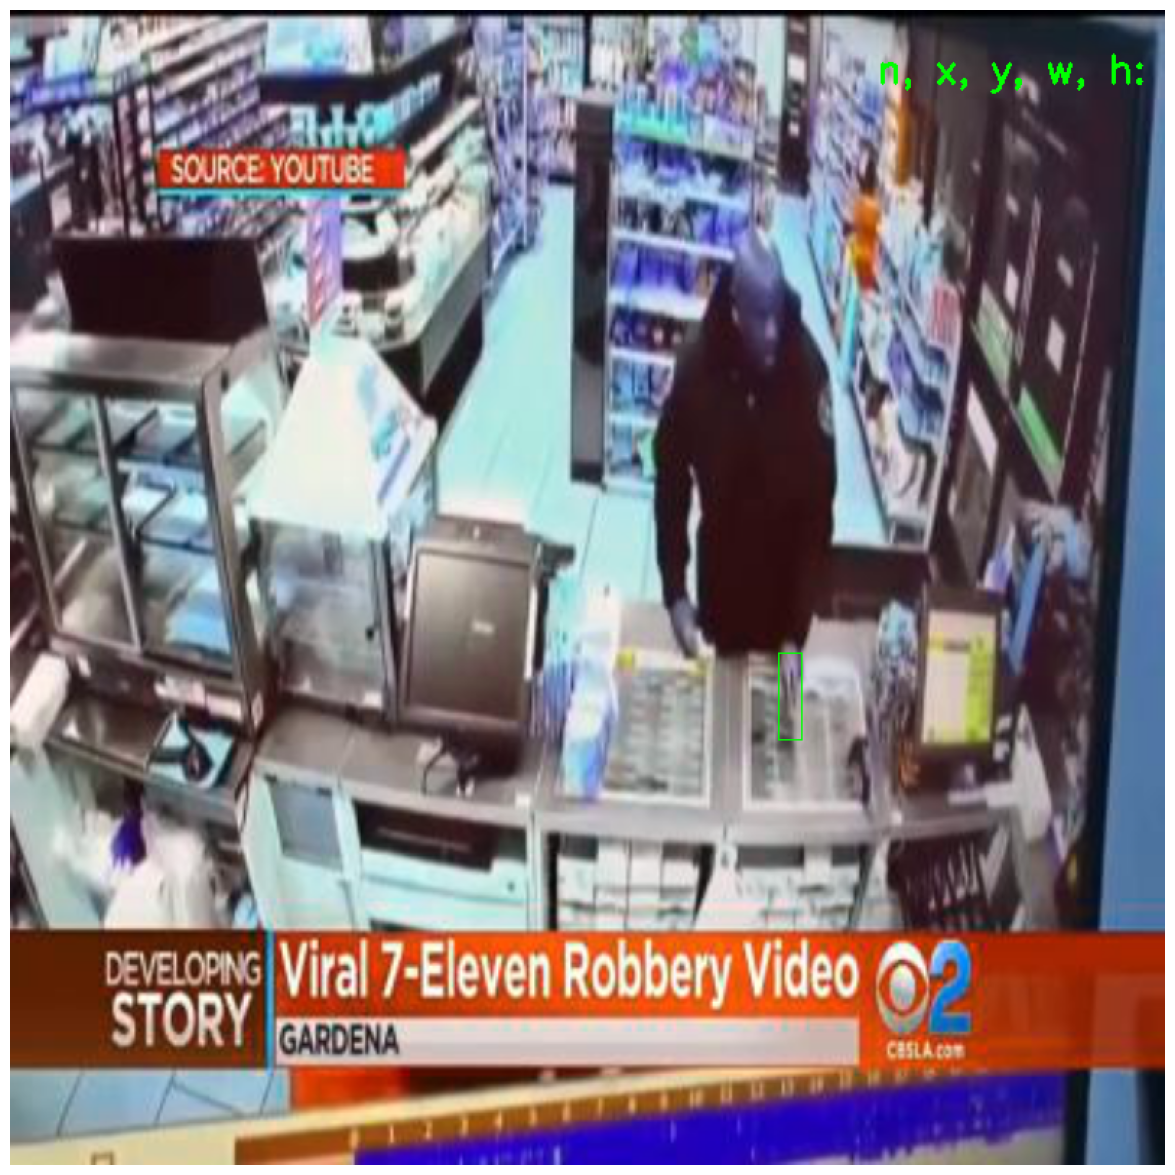

In [4]:
# with open(classes_path, 'r') as file:
#     classes = yaml.safe_load(file)
# classes = classes['names']

exit = 0
f_lst = sorted(os.listdir(images_path))
# idx_stop = f_lst.index('1707310334279799_jpg.rf.de036ef186fc6c452fd33ebc10c1a86b.jpg') - 1
idx_stop = 0
for idx, file_path in enumerate(sorted(os.listdir(images_path))[idx_stop:]):

    img_path = images_path + '/' + file_path
    lbl_path = labels_path + '/' + file_path[:-4] + '.txt'
    if not os.path.exists(lbl_path):
        os.remove(img_path)
        continue
        # with open(lbl_path, 'w') as f:
        #     f.write('0 100 100 100 100')
    coord = open(lbl_path).read().split('\n')
    # coord = [x for x in coord if not x.startswith(('1 ', '3 '))]

    if len(coord) == 0:
        os.remove(lbl_path)
        os.remove(img_path)
        continue
    
    while 1:
        exit_inner = 0
        clear_output(wait=True)
        print(f"File path: {file_path} | {idx + idx_stop}/{len(f_lst)}")
        
        img = cv.imread(img_path)
        img = cv.resize(img, (800, 800))
        high, width = img.shape[:2]
        
        for lst in coord:
            lst = lst.split()
            if len(lst) < 5:
                os.remove(img_path)
                os.remove(lbl_path)
                exit_inner = 1
                break
                # lst = ['0', '100', '100', '100', '100']
            x, y, w, h = int(float(lst[1]) * width), int(float(lst[2]) * high), int(float(lst[3]) * width), int(float(lst[4]) * high)
            print(lst[0], x, y, w, h)

            cv.rectangle(
                img, 
                (x - w // 2, y - h // 2), 
                (x + w // 2, y + h // 2), 
                (0, 255, 0), 
                1
            )
            cv.putText(
                img, 
                "n, x, y, w, h: " + f"{lst[0]} {x} {y} {w} {h}",
                (600, 50 + 30 * int(lst[0])),
                cv.FONT_HERSHEY_SIMPLEX, 0.9, 
                (0, 255, 0), 
                2
            )
        if exit_inner:
            break
        
        plt.figure(figsize=(15, 15))
        plt.axis('off')
        plt.imshow(img, cmap='gray')
        plt.show()

        answer = input('Continue? (y/d/n/<n, x y w h>): ')
        if answer == 'n':
            exit = 1
            break
        elif answer == 'd':
            if os.path.exists(lbl_path):
                os.remove(lbl_path)
            if os.path.exists(img_path):
                os.remove(img_path)
            break
        elif answer.startswith('d') and len(answer) > 1:
            n = int(answer.split()[1])
            if n < len(coord):
                coord.pop(n)
        elif len(answer) > 1:
            n, x, y, w, h = map(int, answer.split())
            # Кодируем обратно в относительные координаты
            n, x, y, w, h = n, x / width, y / high, w / width, h / high
            if n < len(coord):
                coord[n] = ' '.join(map(str, [0, x, y, w, h]))
            else:
                coord.append(' '.join(map(str, [0, x, y, w, h])))
        else:
            with open(lbl_path, 'w') as f:
                f.write('\n'.join(coord))
            break

    if exit:
        break

- **y*** - Переход к следующему элементу (можно оставлять пустым)
- **d** - Удаление элемента (удаляет файл изображения и его метку)
- **n** - Выход из цикла
- **<n, x y w h>** - Выбор области для метки в формате ```0 1413 796 40 77``` (номер изображения, x, y, ширина, высота)

**Примечание:** Если необходимо добавить новую метку, то нужно вставить следующий индекс по нумерации в **<n, x y w h>**.

#### Правила работы с box-ами

Координаты box-а задаются четырьмя числами: x1, y1, x2, y2. 

- x1, y1 - координаты левого верхнего угла, 
- x2, y2 - координаты правого нижнего угла.

Для смещения box-а:

- x1 += dx (смещение вправо на dx)
- y1 += dy (смещение вниз на dy)
- x2 += dx (увеличение ширины вправо на dx)
- y2 += dy (увеличение высоты вверх на dy)

## Обработка изображений

---

In [3]:
main_path = '/Users/mac/dev/gov/Real-Time-Guns-Detection'

dataset_path = os.path.join(main_path, 'data')

### Чистка изображений

---

In [2]:
lst_img = []

print('=' * 50)

for part in ('train', 'valid', 'test'):
    img_folder_path = os.path.join(dataset_path, part, 'images')
    lbl_folder_path = os.path.join(dataset_path, part, 'labels')

    print(part, len(os.listdir(img_folder_path)), len(os.listdir(lbl_folder_path)))
    for file in os.listdir(lbl_folder_path):
        file_path = os.path.join(lbl_folder_path, file)
        if file.endswith('.txt') and os.path.exists(os.path.join(img_folder_path, file[:-4] + '.jpg')):
            lst_img.append(file[:-4] + '.jpg')
        else:
            os.remove(file_path)
            if os.path.exists(os.path.join(lbl_folder_path, file[:-4] + '.txt')):
                os.remove(os.path.join(lbl_folder_path, file[:-4] + '.txt'))
    print(part, len(os.listdir(img_folder_path)), len(os.listdir(lbl_folder_path)))

print('=' * 50)

for part in ('train', 'valid', 'test'):
    img_folder_path = os.path.join(dataset_path, part, 'images')
    lbl_folder_path = os.path.join(dataset_path, part, 'labels')

    print(part, len(os.listdir(img_folder_path)), len(os.listdir(lbl_folder_path)))
    for file in os.listdir(img_folder_path):
        if file not in lst_img:
            os.remove(os.path.join(img_folder_path, file))
            if os.path.exists(os.path.join(lbl_folder_path, file[:-4] + '.txt')):
                os.remove(os.path.join(lbl_folder_path, file[:-4] + '.txt'))
    print(part, len(os.listdir(img_folder_path)), len(os.listdir(lbl_folder_path)))

print('=' * 50)

train 9893 9904
train 9893 9893
valid 1415 1415
valid 1415 1415
test 817 817
test 817 816
train 9893 9893
train 9893 9893
valid 1415 1415
valid 1415 1415
test 817 816
test 816 816


### Изменение меток

---

In [4]:
for part in ('train', 'valid', 'test'):
    lbl_folder_path = os.path.join(dataset_path, part, 'labels')

    for file in os.listdir(lbl_folder_path):
        with open(os.path.join(lbl_folder_path, file), 'r') as f:
            lines = f.readlines()
        with open(os.path.join(lbl_folder_path, file), 'w') as f:
            f.write(''.join(['0' + line[1:] for line in lines if len(line) > 1]))

### Запись в файл путей к изображениям

---

(Нужно для обучения модели с помощью YOLO)

In [12]:
train_dir = os.listdir(os.path.join(dataset_path, 'train', 'images'))
val_dir = os.listdir(os.path.join(dataset_path, 'valid', 'images'))

with open(os.path.join(main_path, 'train.txt'), 'w') as f:
    for i in train_dir:
        if i.endswith('jpg'):
            f.write(f'{main_path}/data/train/images/{i}\n')
            
with open(os.path.join(main_path, 'valid.txt'), 'w') as f:
    for i in val_dir:
        if i.endswith('jpg'):
            f.write(f'{main_path}/data/valid/images/{i}\n')

with open(os.path.join(main_path, 'obj.names'), 'w') as f:
    f.write('gun\n')

In [13]:
obj_data_output_string = """classes = 1
train = train.txt
valid = test.txt
names = obj.names
backup = backup"""

with open(os.path.join(main_path, 'obj.data'), 'w') as f:
    f.write(obj_data_output_string)

!mkdir -p /Users/mac/dev/gov/Real-Time-Guns-Detection/backup

In [4]:
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len(os.path.join(main_path, 'data', 'obj.names'))
max_batches = num_classes * 2000
steps1 = .8 * max_batches
steps2 = .9 * max_batches
steps_str = str(steps1) + ',' + str(steps2)
num_filters = (num_classes + 5) * 3


print("writing config for a custom YOLOv4 detector detecting number of classes: " + str(num_classes))

writing config for a custom YOLOv4 detector detecting number of classes: 1


### Добавление пустых файлов для меток

---

In [2]:
path = '/Users/mac/dev/gov/Real-Time-Guns-Detection/data/empty/images'
another_fold = '/Users/mac/dev/gov/Real-Time-Guns-Detection/data/empty/labels'

for file_name in os.listdir(path):
    if file_name.endswith('.jpg') and not file_name.startswith('.'):
        file_path = os.path.join(path, file_name)
        another_file = os.path.join(another_fold, file_name[:-4] + '.txt')
        with open(another_file, 'w') as f:
            f.write('')


### Сбор данных в DataFrame

---

In [20]:
import pandas as pd

In [21]:
df = pd.DataFrame(columns=['part', 'img', 'x', 'y', 'w', 'h'])

for part in ('train', 'valid', 'test'):
    list_img = [img for img in os.listdir(os.path.join(dataset_path, part, 'images')) if img.endswith('.jpg')]
    list_txt = [lbl for lbl in os.listdir(os.path.join(dataset_path, part, 'labels')) if lbl.endswith('.txt')]

    for img in list_img:
        with open(os.path.join(dataset_path, part, 'labels', img[:-4] + '.txt'), 'r') as f:
            lines = f.readlines()
        for line in lines:
            n, x, y, w, h = map(float, line.split())
            df_tmp = pd.DataFrame([[part, img, x, y, w, h]], columns=['part', 'img', 'x', 'y', 'w', 'h'])
            df = pd.concat([df, df_tmp], ignore_index=True)

df.head()

/var/folders/c6/q59zfffj4zv80fh29cnbfxtr0000gn/T/ipykernel_56844/3092825756.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_tmp], ignore_index=True)


,part,img,x,y,w,h
0,train,V1-frame-929_jpg.rf.687a7a5c74e5742c8711c8dc63...,0.717105,0.586944,0.134539,0.118333
1,train,897_jpg.rf.a3f1a58d330824525077ab51d458ae5e.jpg,0.311298,0.341346,0.063702,0.118990
2,train,17073104039041507_jpg.rf.a6014b5c721d86a31a5a3...,0.694531,0.360156,0.575000,0.615625
3,train,372_jpg.rf.089eae1d1cee71de04ccb83d2254d726.jpg,0.656250,0.550481,0.039663,0.037260
4,train,V2-frame-121_jpg.rf.50ad1c1eb84ee41a6d5ca55dfd...,0.300945,0.303722,0.064391,0.063000


In [22]:
df.part.value_counts()

part
train    11507
valid     1731
test       982
Name: count, dtype: int64

In [23]:
df.part.value_counts() / df.shape[0] * 100

part
train    80.921238
valid    12.172996
test      6.905767
Name: count, dtype: float64

In [24]:
df.part.count()

14220

## Скачивание изображений

---

In [12]:
from simple_image_download import simple_image_download as sid
from time import sleep

In [ ]:
response = sid.simple_image_download
for i in range(10):
    response().download(keywords='Guns', limit=10)
    sleep(1)

In [ ]:
response().simple_image_download